In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [42]:
df = pd.read_csv("diamonds.csv")

### Exploratory Analysis

In [43]:
# (rows, columns)
df.shape

(50000, 5)

In [44]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'price'], dtype='object')

In [45]:
# Brief visualization of the dataset
df.head()

,carat,cut,color,clarity,price
0,0.51,Premium,F,VS1,1749.0
1,2.25,Fair,G,I1,7069.0
2,0.70,Very Good,E,VS2,2757.0
3,0.47,Good,F,VS1,1243.0
4,0.30,Ideal,G,VVS1,789.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    49994 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   price    49997 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.9+ MB


#### Show the summary statistics of the numeric variables

##### The count, mean, min and max rows are self-explanatory. The std shows the standard deviation, and the 25%, 50% and 75% rows show the corresponding percentiles

In [47]:
df.describe()

,carat,price
count,49994.000000,4.999700e+04
mean,0.798602,1.672039e+06
std,0.474653,3.729873e+08
min,0.200000,3.260000e+02
25%,0.400000,9.480000e+02
50%,0.700000,2.403000e+03
75%,1.040000,5.331000e+03
max,5.010000,8.340000e+10


#### Check the missing values

In [48]:
df.isna().sum()

carat      6
cut        0
color      0
clarity    0
price      3
dtype: int64

### Data Analysis & Visualization

#### corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [49]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending = False)

price    1.00000
carat   -0.00384
Name: price, dtype: float64

#### Checking if there are any 0 values

In [50]:
df.query("price==0 or carat==0")

,carat,cut,color,clarity,price


c:\Users\qatra\Desktop\A\.venv_reg\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\qatra\Desktop\A\.venv_reg\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='carat', ylabel='price'>

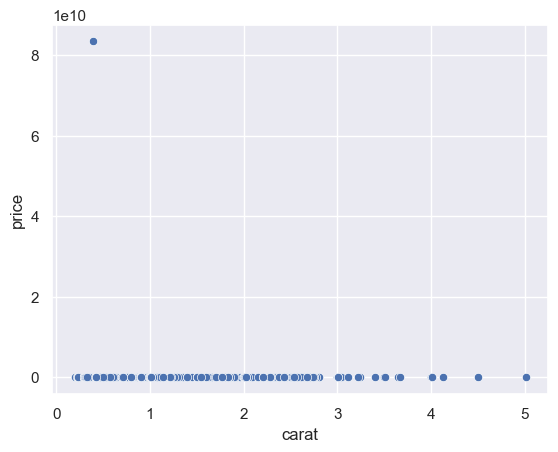

In [51]:
sns.scatterplot(x=df.carat , y=df.price)

In [52]:
len(df.query("carat>4"))

5

In [53]:
len(df.query("carat>2"))

1754

C:\Users\qatra\AppData\Local\Temp\ipykernel_30956\2239777731.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)
c:\Users\qatra\Desktop\A\.venv_reg\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\qatra\Desktop\A\.venv_reg\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_in

<Axes: xlabel='price', ylabel='Density'>

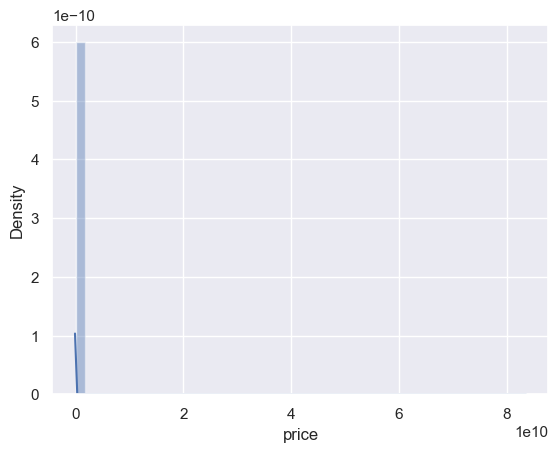

In [54]:
sns.distplot(df.price)

### Data Preparation

#### Removing missing values

In [55]:
df.dropna(inplace = True)

In [56]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
price      0
dtype: int64

In [57]:
df.shape

(49991, 5)

#### Removing outliers

In [58]:
df.query("price>18000")

,carat,cut,color,clarity,price
6,2.01,Very Good,G,SI1,1.839800e+04
10,0.39,Premium,H,SI1,8.340000e+10
91,2.09,Very Good,I,VS1,1.821500e+04
176,2.20,Premium,G,SI1,1.819300e+04
598,2.02,Ideal,G,VS2,1.807700e+04
...,...,...,...,...,...
49123,1.70,Ideal,F,VS2,1.805500e+04
49554,1.54,Ideal,G,VVS1,1.829400e+04
49555,2.01,Ideal,H,SI1,1.818600e+04
49707,2.57,Premium,J,SI1,1.848500e+04


In [59]:
df.query("price>19000")

,carat,cut,color,clarity,price
10,0.39,Premium,H,SI1,8.340000e+10


In [60]:
df.drop(df.query("price>19000").index, inplace=True)

c:\Users\qatra\Desktop\A\.venv_reg\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\qatra\Desktop\A\.venv_reg\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='carat', ylabel='price'>

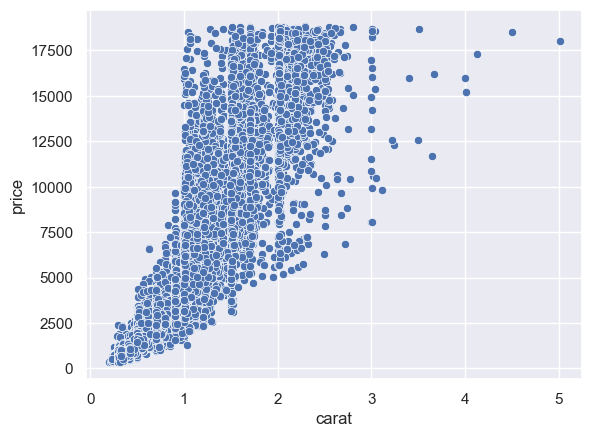

In [61]:
sns.scatterplot(x=df.carat , y=df.price)

#### Feature Engineering

##### Since that dataset has non-numerical values we apply feature engineering methods for them.
##### Applying a dummy variables for categorical variables (cut, color, clarity) using a “replace” function.

In [62]:
df.cut.unique()

array(['Premium', 'Fair', 'Very Good', 'Good', 'Ideal'], dtype=object)

In [63]:
df.cut.replace({'Ideal':5, 'Premium':4, 'Very Good':3, 'Good':2, 'Fair':1}, inplace = True)
df.head()

,carat,cut,color,clarity,price
0,0.51,4,F,VS1,1749.0
1,2.25,1,G,I1,7069.0
2,0.70,3,E,VS2,2757.0
3,0.47,2,F,VS1,1243.0
4,0.30,5,G,VVS1,789.0


In [64]:
df.color.unique()

array(['F', 'G', 'E', 'D', 'H', 'J', 'I'], dtype=object)

In [65]:
df.color.replace({'J':7, 'I':6, 'H':5, 'G':4, 'F':3, 'E':2, 'D':1}, inplace = True)
df.head()

,carat,cut,color,clarity,price
0,0.51,4,3,VS1,1749.0
1,2.25,1,4,I1,7069.0
2,0.70,3,2,VS2,2757.0
3,0.47,2,3,VS1,1243.0
4,0.30,5,4,VVS1,789.0


In [66]:
df.clarity.unique()

array(['VS1', 'I1', 'VS2', 'VVS1', 'SI1', 'VVS2', 'SI2', 'IF'],
      dtype=object)

In [67]:
df.clarity.replace({'IF':8, 'I1':7, 'VVS1':6, 'VVS2':5, 'VS2':4, 'VS1':3, 'SI1':2, 'SI2':1}, inplace=True)
df.head()

,carat,cut,color,clarity,price
0,0.51,4,3,3,1749.0
1,2.25,1,4,7,7069.0
2,0.70,3,2,4,2757.0
3,0.47,2,3,3,1243.0
4,0.30,5,4,6,789.0


#### Splitting the dataset to Train and Test sets

#### First, drop the price column since we want to predicts Diamond price
#### And assign the dataset to variable X

In [68]:
X = df.drop(['price'], axis = 1)
X.head()

,carat,cut,color,clarity
0,0.51,4,3,3
1,2.25,1,4,7
2,0.70,3,2,4
3,0.47,2,3,3
4,0.30,5,4,6


#### Assign the column price to variable y

In [69]:
y = df['price']
y.head()

0    1749.0
1    7069.0
2    2757.0
3    1243.0
4     789.0
Name: price, dtype: float64

#### Splitting X and y into training and testing sets

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Modeling (Linear Regression Model)

In [71]:
from sklearn import datasets, linear_model, metrics

# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

#### regression coefficients

##### Estimateing of the unknown population parameters and describe the relationship between a predictor variable and the response.

In [72]:
print('Coefficients: ', reg.coef_)

Coefficients:  [8446.67428842  215.01950683 -286.08691745  309.69170443]


#### Variance score for both train and test. 1 means perfect prediction

In [73]:
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Variance score: 0.8806441668935728


In [74]:
print('Variance score: {}'.format(reg.score(X_train, y_train)))

Variance score: 0.8820447949885557


#### Plot for residual error

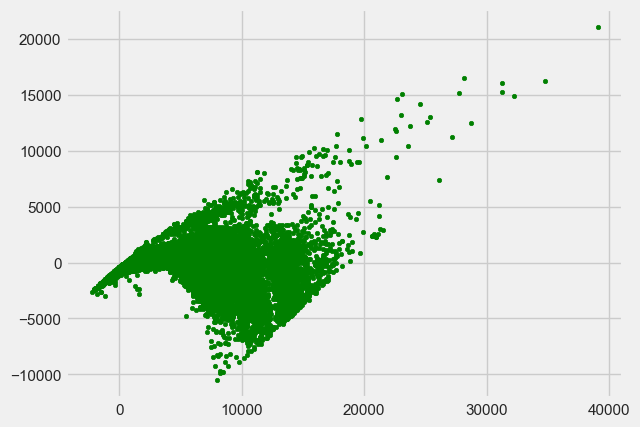

In [75]:
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')

In [76]:
y_pred = reg.predict(X_test)

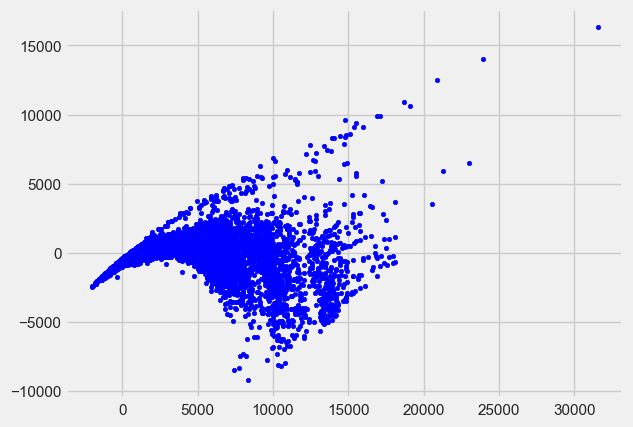

In [77]:
## plotting residual errors in test data
plt.scatter(y_pred, y_pred - y_test, color = "blue", s = 10, label = 'Test data');

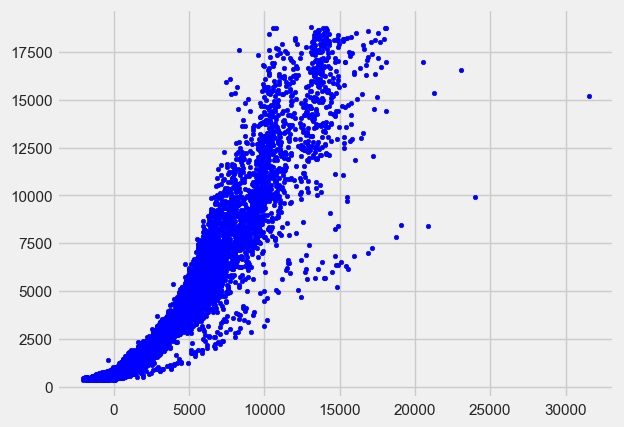

In [78]:
## plotting y_pred, y_test
plt.scatter(y_pred, y_test, color = "blue", s = 10, label = 'Test data');

### Model performance metrics

#### rmse

In [79]:
def RMSE(predict, target):
    return np.sqrt(((predict - target) ** 2).mean())
print ('My RMSE: ' + str(RMSE(y_pred,y_test)) )

My RMSE: 1367.999897278587


#### r-squared

##### The R squared on the training set is almost equal to the R squared on the test set. This is an indicative that our linear regression model is not overfitting and therefore generalizing well to new data.

In [80]:
print('R squared of the Linear Regression on training set: {:.2%}'.format(reg.score(X_train, y_train)))
print('R squared of the Linear Regression on test set: {:.2%}'.format(reg.score(X_test, y_test)))

R squared of the Linear Regression on training set: 88.20%
R squared of the Linear Regression on test set: 88.06%


c:\Users\qatra\Desktop\A\.venv_reg\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\qatra\Desktop\A\.venv_reg\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='price'>

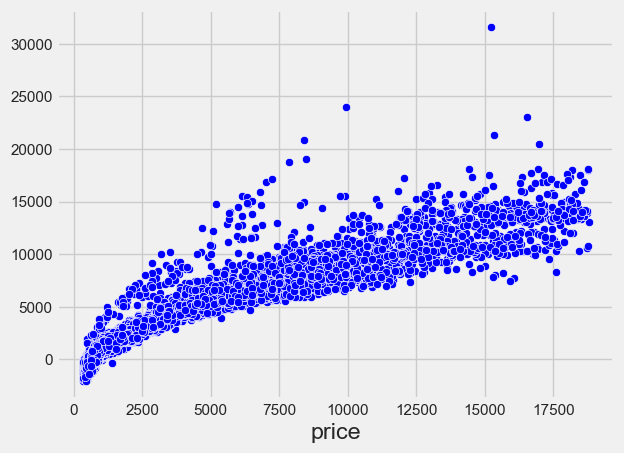

In [81]:
y_pred = reg.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred, color="blue")

In [82]:
df["price"].describe()

count    49990.000000
mean      3939.211922
std       3996.073267
min        326.000000
25%        948.000000
50%       2403.000000
75%       5330.000000
max      18823.000000
Name: price, dtype: float64